In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.4     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "uas-pca-3"

In [2]:
library(readr)
UAS_PCA_dan_MLR <- read.csv("../input/uas-pca-3/UAS_PCA-dan-Multi-Linear-Regression_3.csv")
View(UAS_PCA_dan_MLR)
str(UAS_PCA_dan_MLR)

Customer.ID,Umur,Income,Product_holding,Saving,Deposit,KK,Tab_Bisnis,Limit.Kredit.Mortgage,X,X.1,X.2,X.3
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1234561175,27,14922073,3,12281464,22079895,856297,0,584537076,1,1,1,0
1234561810,53,22699062,3,11326354,0,599572,17479146,5489742167,1,0,1,1
1234561778,52,11713291,2,5267624,0,2743516,0,5042482992,1,0,1,0
1234561915,40,47603527,4,35166047,18639840,4534694,18489681,3359847290,1,1,1,1
1234561363,55,31274485,2,27204559,0,0,11176695,2218708540,1,0,0,1
1234561836,49,37245793,2,14818534,18926176,0,0,338405891,1,1,0,0
1234561944,32,47748313,1,44317761,0,0,0,2606510465,1,0,0,0
1234561830,45,27679856,3,21582195,24001866,0,12135457,3836297309,1,1,0,1
1234561621,33,43460028,4,16480520,17599716,2003089,13794361,4094418279,1,1,1,1


'data.frame':	999 obs. of  13 variables:
 $ Customer.ID          : int  1234561175 1234561810 1234561778 1234561915 1234561363 1234561836 1234561944 1234561830 1234561621 1234561498 ...
 $ Umur                 : int  27 53 52 40 55 49 32 45 33 39 ...
 $ Income               : int  14922073 22699062 11713291 47603527 31274485 37245793 47748313 27679856 43460028 37837120 ...
 $ Product_holding      : int  3 3 2 4 2 2 1 3 4 3 ...
 $ Saving               : int  12281464 11326354 5267624 35166047 27204559 14818534 44317761 21582195 16480520 33380301 ...
 $ Deposit              : int  22079895 0 0 18639840 0 18926176 0 24001866 17599716 0 ...
 $ KK                   : int  856297 599572 2743516 4534694 0 0 0 0 2003089 2670910 ...
 $ Tab_Bisnis           : int  0 17479146 0 18489681 11176695 0 0 12135457 13794361 14794262 ...
 $ Limit.Kredit.Mortgage: num  5.85e+08 5.49e+09 5.04e+09 3.36e+09 2.22e+09 ...
 $ X                    : int  1 1 1 1 1 1 1 1 1 1 ...
 $ X.1                  : int  1 0

In [3]:
head(UAS_PCA_dan_MLR)
summary(UAS_PCA_dan_MLR)

,Customer.ID,Umur,Income,Product_holding,Saving,Deposit,KK,Tab_Bisnis,Limit.Kredit.Mortgage,X,X.1,X.2,X.3
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,1234561175,27,14922073,3,12281464,22079895,856297,0,584537076,1,1,1,0
2,1234561810,53,22699062,3,11326354,0,599572,17479146,5489742167,1,0,1,1
3,1234561778,52,11713291,2,5267624,0,2743516,0,5042482992,1,0,1,0
4,1234561915,40,47603527,4,35166047,18639840,4534694,18489681,3359847290,1,1,1,1
5,1234561363,55,31274485,2,27204559,0,0,11176695,2218708540,1,0,0,1
6,1234561836,49,37245793,2,14818534,18926176,0,0,338405891,1,1,0,0


  Customer.ID             Umur           Income         Product_holding
 Min.   :1.235e+09   Min.   :20.00   Min.   :10000381   Min.   :1.000  
 1st Qu.:1.235e+09   1st Qu.:29.00   1st Qu.:18875134   1st Qu.:2.000  
 Median :1.235e+09   Median :38.00   Median :29317692   Median :3.000  
 Mean   :1.235e+09   Mean   :37.85   Mean   :29399072   Mean   :2.512  
 3rd Qu.:1.235e+09   3rd Qu.:47.00   3rd Qu.:39491486   3rd Qu.:3.000  
 Max.   :1.235e+09   Max.   :55.00   Max.   :49990642   Max.   :4.000  
     Saving            Deposit               KK            Tab_Bisnis      
 Min.   :  578986   Min.   :       0   Min.   :      0   Min.   :       0  
 1st Qu.:13607825   1st Qu.:       0   1st Qu.:      0   1st Qu.:       0  
 Median :27229285   Median :       0   Median : 534345   Median :10224456  
 Mean   :26094433   Mean   : 8102379   Mean   :1375051   Mean   : 7680451  
 3rd Qu.:38045682   3rd Qu.:16703690   3rd Qu.:2670998   3rd Qu.:15077882  
 Max.   :49997610   Max.   :29986125   M

In [4]:
myPr <- prcomp(UAS_PCA_dan_MLR[, 7:13])
prcomp(~Income + Tab_Bisnis, data = UAS_PCA_dan_MLR)

Standard deviations (1, .., p=2):
[1] 11645171  7761392

Rotation (n x k) = (2 x 2):
                  PC1         PC2
Income     0.99954064  0.03030696
Tab_Bisnis 0.03030696 -0.99954064

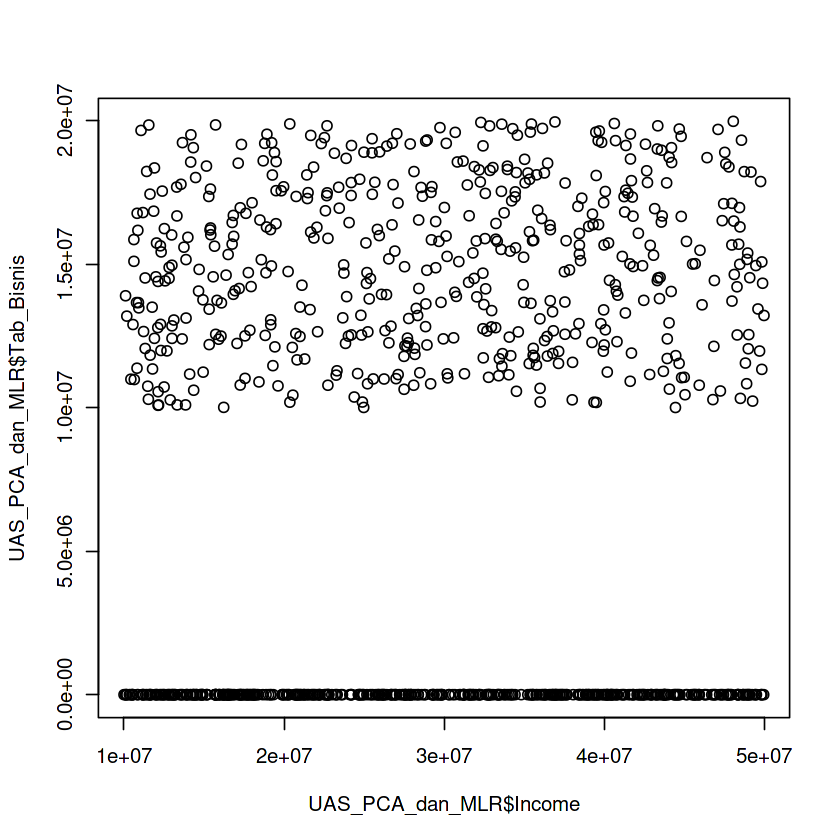

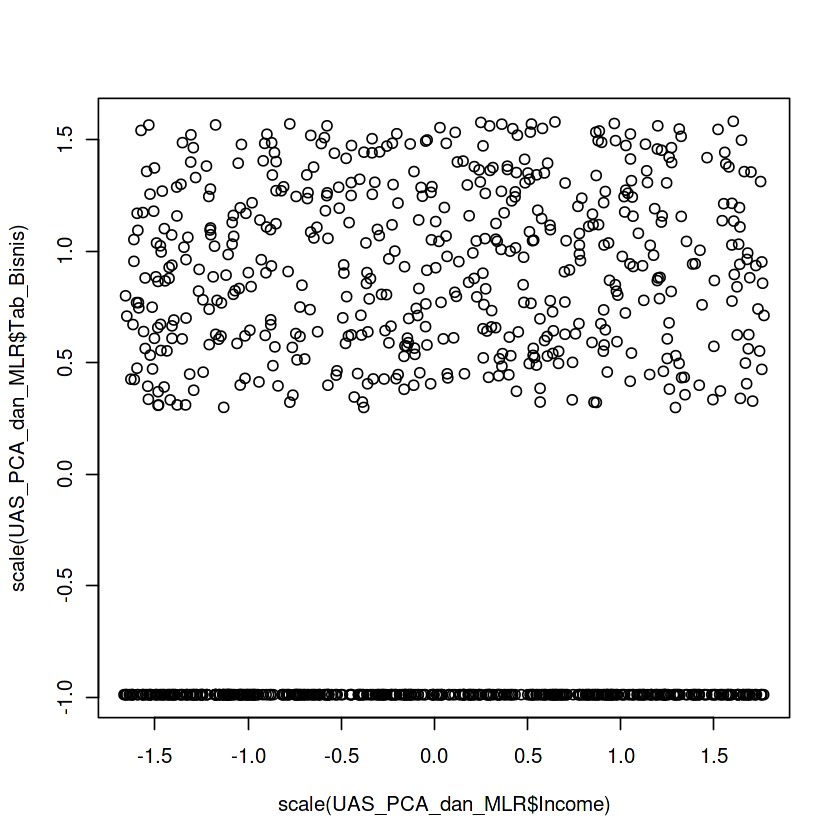

In [5]:
plot (UAS_PCA_dan_MLR$Income, UAS_PCA_dan_MLR$Tab_Bisnis)
plot (scale(UAS_PCA_dan_MLR$Income), scale(UAS_PCA_dan_MLR$Tab_Bisnis))

Standard deviations (1, .., p=7):
[1] 1.662291e+09 7.761341e+06 1.645946e+06 5.001871e-01 2.773836e-01
[6] 1.310444e-01 3.351363e-19

Rotation (n x k) = (7 x 7):
                                PC1           PC2           PC3           PC4
KK                     1.801239e-05  2.171147e-04 -1.000000e+00 -6.243507e-09
Tab_Bisnis            -1.591948e-04  1.000000e+00  2.171118e-04  2.974728e-10
Limit.Kredit.Mortgage  1.000000e+00  1.591909e-04  1.804695e-05  9.757340e-12
X                      0.000000e+00  0.000000e+00  0.000000e+00  3.469447e-18
X.1                    9.666550e-12  1.170563e-10 -2.977256e-09 -9.993316e-01
X.2                    1.009592e-12 -3.762918e-10 -2.527464e-07  3.645846e-02
X.3                   -9.676793e-12  6.214669e-08  1.538071e-09 -2.661794e-03
                                PC5           PC6           PC7
KK                     2.526793e-07  2.462389e-09  1.758395e-23
Tab_Bisnis            -1.918963e-10 -6.214762e-08  2.301882e-21
Limit.Kredit.Mortgage 

Importance of components:
                             PC1       PC2     PC3    PC4    PC5   PC6
Standard deviation     1.662e+09 7.761e+06 1645946 0.5002 0.2774 0.131
Proportion of Variance 1.000e+00 2.000e-05       0 0.0000 0.0000 0.000
Cumulative Proportion  1.000e+00 1.000e+00       1 1.0000 1.0000 1.000
                             PC7
Standard deviation     3.351e-19
Proportion of Variance 0.000e+00
Cumulative Proportion  1.000e+00

Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”
Warning message in arrows(0, 0, y[, 1L] * 0.8, y[, 2L] * 0.8, col = col[2L], length = arrow.len):
“zero-length arrow is of indeterminate angle and so skipped”


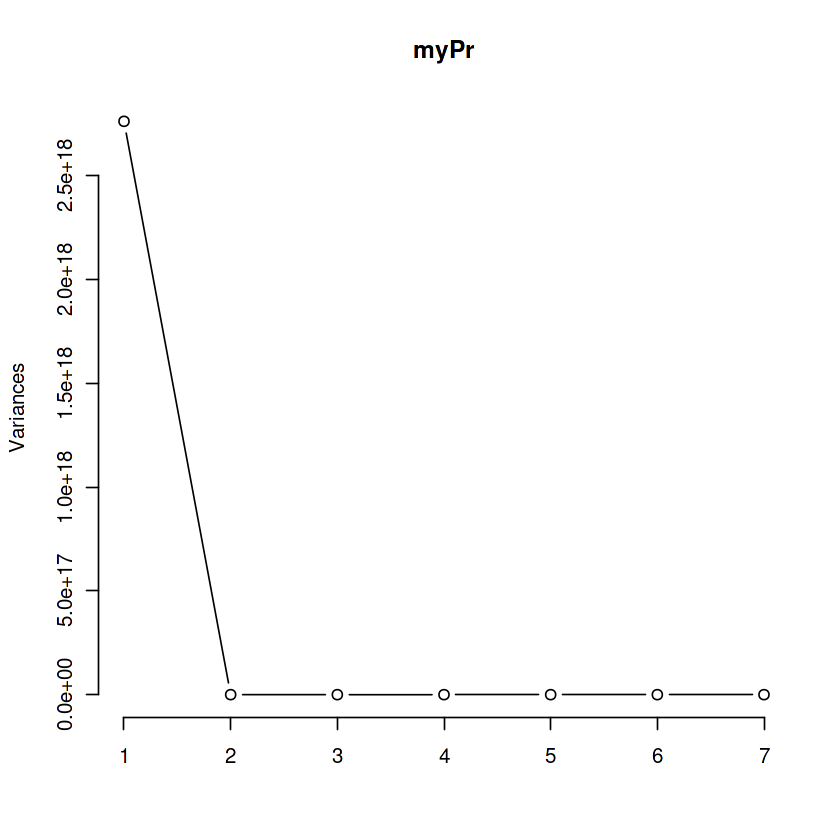

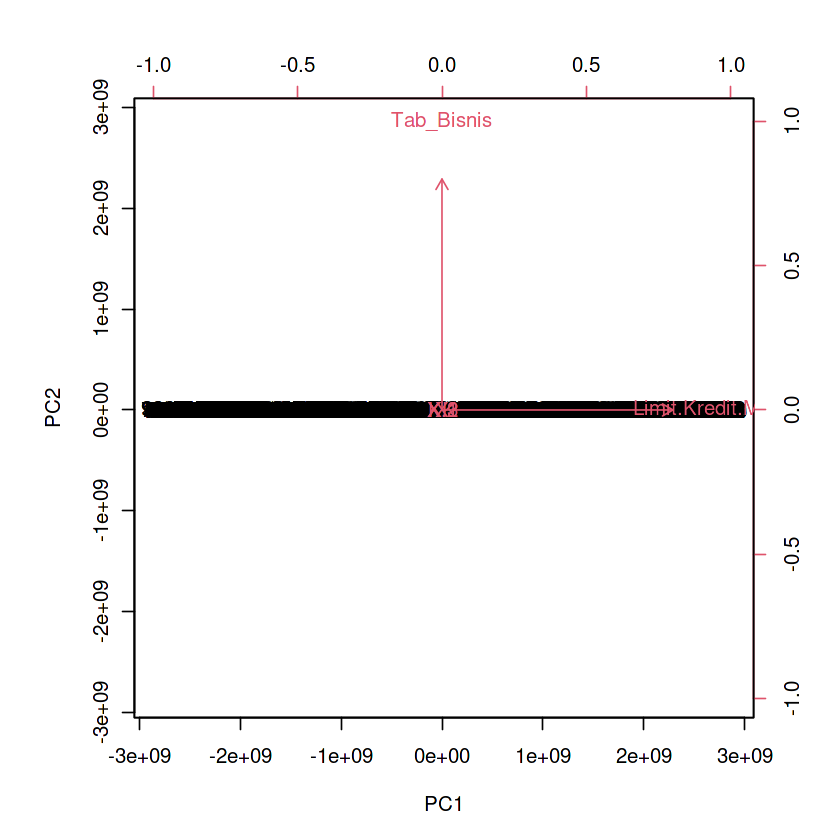

In [6]:
myPr
summary(myPr)
plot(myPr, type = "l")
biplot(myPr, scale = 0)